# Data Project


The following code analyses commuting distances in Denmark.

In [158]:
#Import numpy package
import numpy as np

#Import pandas package
import pandas as pd

#Import operating system to import data from the computer
import os 

##Import pyplot and chosing style
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from matplotlib.ticker import FuncFormatter

import matplotlib as mpl

#Autoload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
#Data import

#Folder name and file name
#assert os.path.isdir('Data/')
assert os.path.isfile('pendling1.xlsx')

#Folder name
#os.listdir('Data/')

#Naming file
file = 'pendling1.xlsx'

In [160]:
#Using panda to read file
commute = pd.read_excel(file)

#See the name of the variables - printing first 10 obs
print(commute.head(10))

   Unnamed: 0 Unnamed: 1   Unnamed: 2      Unnamed: 3  Unnamed: 4
0        2008      I alt  Hele landet           I alt     2844814
1        2008      I alt  Hele landet  Ingen pendling      176141
2        2008      I alt  Hele landet     Indtil 5 km      912601
3        2008      I alt  Hele landet         5-10 km      519211
4        2008      I alt  Hele landet        10-20 km      541968
5        2008      I alt  Hele landet        20-30 km      271471
6        2008      I alt  Hele landet        30-40 km      140194
7        2008      I alt  Hele landet        40-50 km       78796
8        2008      I alt  Hele landet      Over 50 km      197718
9        2008      I alt  Hele landet   Ikke beregnet        6714


In [150]:
#Renaming relevant columns
commute.rename(columns = {'Unnamed: 0':'year'}, inplace=True) #Year
commute.rename(columns = {'Unnamed: 2':'region'}, inplace=True) #Region
commute.rename(columns = {'Unnamed: 3':'distance'}, inplace=True) #Distance to work place
commute.rename(columns = {'Unnamed: 4':'workers'}, inplace=True) #Number of workers

#Look at the data again and the shape of data - printing first 10 obs
print(commute.head(10))
print(f'Data set about communiting areas has shape {commute.shape}')

   year Unnamed: 1       region        distance  workers
0  2008      I alt  Hele landet           I alt  2844814
1  2008      I alt  Hele landet  Ingen pendling   176141
2  2008      I alt  Hele landet     Indtil 5 km   912601
3  2008      I alt  Hele landet         5-10 km   519211
4  2008      I alt  Hele landet        10-20 km   541968
5  2008      I alt  Hele landet        20-30 km   271471
6  2008      I alt  Hele landet        30-40 km   140194
7  2008      I alt  Hele landet        40-50 km    78796
8  2008      I alt  Hele landet      Over 50 km   197718
9  2008      I alt  Hele landet   Ikke beregnet     6714
Data set about communiting areas has shape (1200, 5)


In [151]:
#Dropping the second column since it is irrelevant for our analysis
commute.drop(['Unnamed: 1'], axis = 1, inplace = True)

#Take a look at data again - printing first 10 obs
print(commute.head(10))
print(f'Data set about communiting areas has shape {commute.shape}')

   year       region        distance  workers
0  2008  Hele landet           I alt  2844814
1  2008  Hele landet  Ingen pendling   176141
2  2008  Hele landet     Indtil 5 km   912601
3  2008  Hele landet         5-10 km   519211
4  2008  Hele landet        10-20 km   541968
5  2008  Hele landet        20-30 km   271471
6  2008  Hele landet        30-40 km   140194
7  2008  Hele landet        40-50 km    78796
8  2008  Hele landet      Over 50 km   197718
9  2008  Hele landet   Ikke beregnet     6714
Data set about communiting areas has shape (1200, 4)


In [152]:
#We check the types of the data
print(commute.dtypes)

year         int64
region      object
distance    object
workers      int64
dtype: object


In [153]:
#Change year to string variable
commute.year = commute.year.astype(str)

print(commute.dtypes)

#The data is now ready, "commute"

year        object
region      object
distance    object
workers      int64
dtype: object


In [154]:
#Finding number of different regions - recall that "Hele landet" is also included in this
#Finding number of years of data
print(f'Number of regions = {len(commute.region.unique())}')
print(f'Number of years = {len(commute.year.unique())}')

#We want to look further at long distance commuters, which we define as more than 50 km commute
#Excluding "Hele landet" i.e. the total
comm = commute.loc[(commute['distance'] == 'Over 50 km') & (commute['region'] != 'Hele landet')]

#Remove 'Landsdel' from region
comm.region = comm.region.astype(str).str[8:] 

print(comm.head(10)) #printing first 10 obs
print(f'Data set about communiting areas has shape {comm.shape}')

#Descriptive statistics grouped by region on workers
desc = comm.groupby(['region']).describe()
pd.options.display.float_format = '{:.0f}'.format #No decimals
print(desc)

Number of regions = 12
Number of years = 10
     year                 region    distance  workers
18   2008         Byen København  Over 50 km    10187
28   2008       Københavns omegn  Over 50 km     5094
38   2008           Nordsjælland  Over 50 km     8997
48   2008               Bornholm  Over 50 km     1026
58   2008            Østsjælland  Over 50 km     5045
68   2008   Vest- og Sydsjælland  Over 50 km    50203
78   2008                    Fyn  Over 50 km    18743
88   2008             Sydjylland  Over 50 km    28368
98   2008             Østjylland  Over 50 km    32334
108  2008            Vestjylland  Over 50 km    15324
Data set about communiting areas has shape (110, 4)
                      workers                                         
                        count  mean  std   min   25%   50%   75%   max
region                                                                
 Bornholm                  10   861   78   754   814   864   887  1026
 Byen København           

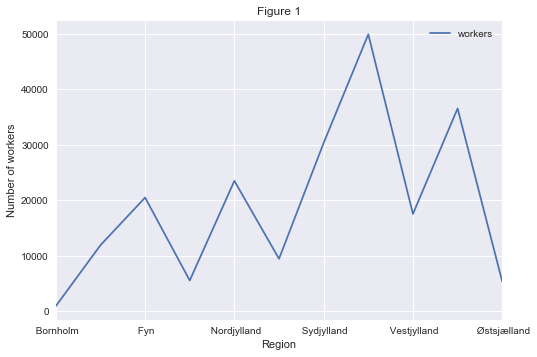

In [155]:
#Defining the mean of commuters in each region
mean = comm.groupby(['region']).mean()

#Plot
def figure():
    
    # i. make the plot
    ax = mean['workers'].plot(legend = True)
    
    # ii. set thousands separator on y-axis
    def thousands(x, pos):
        return '%1.0f' % (x * 1e-3)
    
    formatter = FuncFormatter(thousands)
    
    # iii. set labels
    ax.set_ylabel('Number of workers')
    ax.set_xlabel('Region')
    
    # iv. set title
    ax.set_title('Figure 1')
    

# call the function
figure()

In [156]:
#We want to look further at distance intervals
#Excluding "I alt" i.e. distance in total and "Ikke beregnet" i.e. not calculated distance
comm2 = commute.loc[(commute['region'] == 'Hele landet') & (comma['distance'] != 'I alt') & (commb['distance'] != 'Ikke beregnet')]

print(comm2.head(20))
print(f'Data set about communiting areas has shape {comm2.shape}')

#Descriptive statistics grouped by distance on workers
desc2 = comm2.groupby(['distance']).describe()
pd.options.display.float_format = '{:.0f}'.format #No decimals
print(desc2)

     year       region        distance  workers
1    2008  Hele landet  Ingen pendling   176141
2    2008  Hele landet     Indtil 5 km   912601
3    2008  Hele landet         5-10 km   519211
4    2008  Hele landet        10-20 km   541968
5    2008  Hele landet        20-30 km   271471
6    2008  Hele landet        30-40 km   140194
7    2008  Hele landet        40-50 km    78796
8    2008  Hele landet      Over 50 km   197718
121  2009  Hele landet  Ingen pendling   174035
122  2009  Hele landet     Indtil 5 km   865546
123  2009  Hele landet         5-10 km   495663
124  2009  Hele landet        10-20 km   514918
125  2009  Hele landet        20-30 km   260304
126  2009  Hele landet        30-40 km   136695
127  2009  Hele landet        40-50 km    77087
128  2009  Hele landet      Over 50 km   194697
241  2010  Hele landet  Ingen pendling   173084
242  2010  Hele landet     Indtil 5 km   851785
243  2010  Hele landet         5-10 km   489420
244  2010  Hele landet        10-20 km  

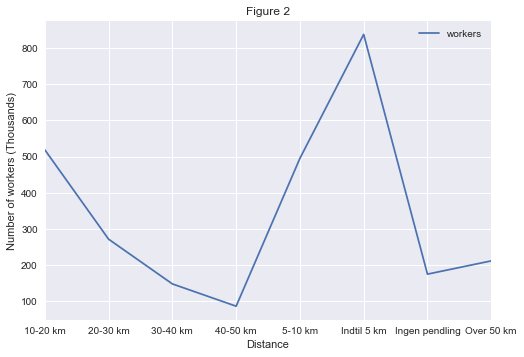

In [157]:
#Defining the mean of commuters in each distance interval
mean2 = comm2.groupby(['distance']).mean()

#Plot
def figure():
    
    # i. make the plot
    ax = mean2['workers'].plot(legend = True)
    
    # ii. set thousands separator on y-axis
    def thousands(x, pos):
        return '%1.0f' % (x * 1e-3)
    
    formatter = FuncFormatter(thousands)
    
    ax.yaxis.set_major_formatter(formatter)
    
    # iii. set labels
    ax.set_ylabel('Number of workers (Thousands)')
    ax.set_xlabel('Distance')
    
    # iv. set title
    ax.set_title('Figure 2')

# call the function
figure()

# Conclusion

In conclusion we find that the amount of people with a long commute (more than 50 km) are at East Jutland and Copenhagen.
This makes sense since the two biggest cities in Denmark are located here and there might be more job opportunities here.
Moreover we found that the most common amount of commute is 0-5 km.